# Refining Computer Sales Strategy Through Statistical Analysis Project - Part 1

In [12]:
# Importing libraries
import numpy as np #for numerical computation
import pandas as pd #for data reading and manipulation
import matplotlib.pyplot as plt #to visualize data
import statistics as st
import scipy.stats as sts
import math
import seaborn as sns #to visualize data
from scipy.stats import t
from scipy.stats import kurtosis
from scipy.stats import norm #probability distribution function
from tabulate import tabulate #to print table
import warnings
warnings.filterwarnings("ignore")

## Data Preprocessing and Cleaning

In [14]:
# Reading data from existing .xlsx file using read_excel() of pandas module and storing into a dataframe
computers_data = pd.read_csv("D:/Documents/NIIT/Course8/Sprint5/DS1_C8_Computers_Data_Project.csv")
computers_data

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
0,1,1499,25,80,4,14,no,no,yes,94,94,1
1,2,1795,33,85,2,14,no,no,yes,94,94,1
2,3,1595,25,170,4,15,no,no,yes,94,94,1
3,4,1849,25,170,8,14,no,no,no,94,94,1
4,5,3295,33,340,16,14,no,no,yes,94,104,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,70,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,70,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,70,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,70,35


In [15]:
# Printing a tuple with the details number of rows and columns 
print(computers_data.shape) 

(6259, 12)


In [16]:
# Printing the information about the dataset
computers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     6259 non-null   int64 
 1   price     6259 non-null   int64 
 2   speed     6259 non-null   int64 
 3   hd        6259 non-null   int64 
 4   ram       6259 non-null   int64 
 5   screen    6259 non-null   int64 
 6   cd        6259 non-null   object
 7   multi     6259 non-null   object
 8   premium   6259 non-null   object
 9   ads_2022  6259 non-null   int64 
 10  ads_2023  6259 non-null   int64 
 11  trend     6259 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 586.9+ KB


In [17]:
# Counting missing values in each column
missing_values = computers_data.isnull().sum()
print('Missing values in each column:\n', missing_values)

Missing values in each column:
 index       0
price       0
speed       0
hd          0
ram         0
screen      0
cd          0
multi       0
premium     0
ads_2022    0
ads_2023    0
trend       0
dtype: int64


In [18]:
# Separate the columns into categorical and numerical data types and display them.
def separate_columns(df):
    cat_cols = []
    num_cols = []
    
    for col in df.columns:
        if df[col].dtype == 'object':
            cat_cols.append(col)
        else:
            num_cols.append(col)
    return cat_cols, num_cols

cat_cols, num_cols = separate_columns(computers_data)

table = [cat_cols, num_cols]
print(tabulate({'Categorical': cat_cols, 'Numerical': num_cols}, headers = ['Categorical columns:', 'Numerical columns:']))

Categorical columns:    Numerical columns:
----------------------  --------------------
cd                      index
multi                   price
premium                 speed
                        hd
                        ram
                        screen
                        ads_2022
                        ads_2023
                        trend


Interpretation- Data preprocessing is done, cleaning is not required. There are no missing values in the data.

## Business Objective 1- Enhance Product Strategy and Sales Performance through Specification-Based Analysis

### Task 1

#### a) Analyze Purchase Likelihood Based on Specifications

The company wants to understand the likelihood of customers purchasing specific computer configurations based on a combination of desired features (RAM size, processor speed, size of the computer screen). What is the probability of a customer purchasing a computer with at least 8GB of RAM, computer screen size of 14 inch, and a processor speed exceeding 33 MHz?

In [24]:
# Filter the DataFrame based on the given conditions
filtered_df = computers_data[(computers_data['ram'] >= 8) & (computers_data['screen'] == 14) & (computers_data['speed'] >= 33)]

# Calculate the probability
total_customers = len(computers_data)
customers_with_desired_configuration = len(filtered_df)
config_probability = round(customers_with_desired_configuration / total_customers, 4)
print("Probability of a customer purchasing a computer with at least 8GB of RAM, computer screen size of 14 inch, and a processor speed exceeding 33 MHz=", config_probability)

Probability of a customer purchasing a computer with at least 8GB of RAM, computer screen size of 14 inch, and a processor speed exceeding 33 MHz= 0.2481


#### b) Probability of Selling Premium Computers

I. What is the probability of selling a premium computer?

In [27]:
# Filter for premium computers
premium_computers = computers_data[(computers_data['premium']) == 'yes']

# Calculate the probability
total_computers = len(computers_data)
total_premium_computers = len(premium_computers)
premium_probability = round(total_premium_computers / total_computers, 4)
print("Probability of selling a premium computer =", premium_probability)

Probability of selling a premium computer = 0.9022


II. Given that a computer is premium, what is the probability that it has a CD player?

In [29]:
# Filter for premium computers
premium_computers = computers_data[(computers_data['premium']) == 'yes']

# Filter for premium computers with CD players
premium_computers_with_cd = premium_computers[(premium_computers['cd']) == 'yes']

# Calculate conditional probability
total_premium_computers = len(premium_computers)
premium_with_cd_probability = round(len(premium_computers_with_cd) / total_premium_computers, 4)
print("Probability of premium computer having a CD player =", premium_with_cd_probability)

Probability of premium computer having a CD player = 0.5001


#### c) Predicting the Probability of Certain Specifications

I. What is the probability of a computer having a screen size greater than 15 inches and being premium?

In [32]:
# Filter the DataFrame based on the given conditions
filtered_df2 = computers_data[(computers_data['screen'] > 15) & (computers_data['premium'] == 'yes')]

# Calculate the probability
total_computers = len(computers_data)
computers_with_desired_configuration = len(filtered_df2)
large_screen_premium_probability = round(computers_with_desired_configuration / total_computers, 4)
print("Probability of a computer having a screen size greater than 15 inches and being premium =", large_screen_premium_probability)

Probability of a computer having a screen size greater than 15 inches and being premium = 0.0847


II. Given that a computer is not premium, what is the probability that it has a screen size less than or equal to 14 inches?

In [34]:
# Filter for non-premium computers
non_premium_computers = computers_data[(computers_data['premium']) == 'no']

# Filter for non-premium computers with screen size less than or equal to 14 inches
non_premium_small_screen = non_premium_computers[(non_premium_computers['screen']) <= 14]

# Calculate conditional probability
total_non_premium_computers = len(non_premium_computers)
non_premium_small_screen_probability = round(len(non_premium_small_screen) / total_non_premium_computers, 4)
print("Probability of a non-premium computer having a screen size less than or equal to 14 inches =", non_premium_small_screen_probability)

Probability of a non-premium computer having a screen size less than or equal to 14 inches = 0.6912


#### d) Likelihood of computers having both a CD player and a multimedia kit 

I. What is the joint probability of computers having both a CD player and a multimedia kit? 

In [37]:
# Filter the DataFrame based on the given conditions
filtered_df3 = computers_data[(computers_data['cd'] == 'yes') & (computers_data['multi'] == 'yes')]

# Calculate the probability
total_computers = len(computers_data)
cd_with_multi_probability = round(len(filtered_df3) / total_computers, 4)
print("Joint Probability of computers having both a CD player and a multimedia kit =", cd_with_multi_probability)

Joint Probability of computers having both a CD player and a multimedia kit = 0.1395


II. Given that a computer has a CD player, what is the probability that it also has a multimedia kit?

In [39]:
# Filter for computers with a CD player
cd_computers = computers_data[(computers_data['cd'] == 'yes')]

# Filter for computers with both CD player and multimedia kit
cd_and_multi_computers = cd_computers[(cd_computers['multi'] == 'yes')]

# Calculate conditional probability
total_cd_computers = len(cd_computers)
cd_having_multi_probability = round(len(cd_and_multi_computers) / total_cd_computers, 4)
print("Probability of a computer with a CD player also having a multimedia kit =", cd_having_multi_probability)

Probability of a computer with a CD player also having a multimedia kit = 0.3002


#### Interpretations-

1. 1 in 4 customer purchases a computer with at least 8GB of RAM, computer screen size of 14 inch, and a processor speed exceeding 33 MHz.
2. 9 out of 10 computers sold are premium computers.
3. Half of the premium computers have a CD player.
4. Probability of a computer having a screen size greater than 15 inches and being premium is very low at 8.47%.
5. 7 out of 10 non-premium computers have smaller screen sizes less than or equal to 14 inches.
6. 13.95% of all computers have both a CD player and a multimedia kit.
7. 30.02% of computers having CD player also have a multimedia kit.

## Business Objective 2: Assessing Price Disparities Between Premium and Non-Premium Computers as compared to prices of both categories together

### Task 2

#### a) What is the average price of computers in the population/whole data? 

In [44]:
# Calculate the average price
average_price = computers_data['price'].mean()

# Round the average price to 2 decimal places
average_price = round(average_price, 2)

print("Average price of computers in the population/whole data =", average_price)

Average price of computers in the population/whole data = 2219.58


#### b) How does the average price of samples vary when data is sampled using different sampling techniques?

In [46]:
print('Average price of samples taken using-')

# Simple Random Sampling with Replacement
srswr_mean = (computers_data['price'].sample(n=100, replace=True, random_state=1)).mean()
print('1. Simple Random Sampling with Replacement technique =',srswr_mean)

# Systematic Sampling
indexes = np.arange(0, len(computers_data), step=10)
sys_samp_mean = round((computers_data['price'].iloc[indexes]).mean(), 2)
print('2. Systematic Sampling technique =',sys_samp_mean)

# Stratified Sampling
strat_samp_mean = (computers_data.groupby('premium')['price'].sample(n=100, replace=True, random_state=1)).mean()
print('3. Stratified Sampling technique =',strat_samp_mean)

# Clustered Sampling
clust_samp_mean = round(computers_data.sample(n=100, replace=True, random_state=1).groupby('index')['price'].mean().mean(), 2)
print('4. Clustered Sampling technique =',clust_samp_mean)

Average price of samples taken using-
1. Simple Random Sampling with Replacement technique = 2181.61
2. Systematic Sampling technique = 2220.65
3. Stratified Sampling technique = 2370.585
4. Clustered Sampling technique = 2186.89


#### c) What is the average price of premium and non-premium computers in the whole data? How does the average price differ between premium and non-premium computers of sampled data using simple random sampling without replacement? 

In [48]:
# Average price of premium and non-premium computers in the whole data
avg_price_premium = round(computers_data[computers_data['premium'] == 'yes']['price'].mean(), 2)
avg_price_non_premium = round(computers_data[computers_data['premium'] == 'no']['price'].mean(), 2)
print("Average price of premium computers:", avg_price_premium)
print("Average price of non-premium computers:", avg_price_non_premium)

# Simple random sampling without replacement
sample_mean_premium = computers_data[computers_data['premium'] == 'yes']['price'].sample(n=100, random_state=1).mean()
print("Average price of premium computers in samples:", sample_mean_premium)
sample_mean_non_premium = computers_data[computers_data['premium'] == 'no']['price'].sample(n=100, random_state=1).mean()
print("Average price of non-premium computers in samples:", sample_mean_non_premium)

Average price of premium computers: 2204.15
Average price of non-premium computers: 2361.93
Average price of premium computers in samples: 2291.92
Average price of non-premium computers in samples: 2316.81


#### d) Write your interpretation by comparing prices of premium and non-premium computers individually and prices of both categories together.

Within Categories:

1. Premium Computers: The average price of premium computers in the samples is slightly higher than the population average. This could be due to random sampling variation or potential biases in the sampling process.
2. Non-Premium Computers: The average price of non-premium computers in the samples is slightly lower than the population average. This again could be attributed to random sampling variability.

Between Categories:

In both the population and the samples, non-premium computers have a higher average price than premium computers. This might seem opposite to expectations, as one might expect premium products to be more expensive. It could be due to various factors such as specific features, brand value, or market dynamics.

#### Interpretations-

1. A computer costs $2219.58 on average.
2. Stratified Sampling technique gives the highest average price of samples taken while Simple Random Sampling with Replacement technique and Clustered Sampling technique give the lowest average price of samples taken.
3. Overall trend indicates that non-premium computers, on average, are more expensive than premium computers in both the population and the samples.

## Business Objective 3: Understanding Computer Price Trends Through Distribution Analysis

### Task 3

#### a) How does the distribution of sample means change for computer prices with different sample sizes? 

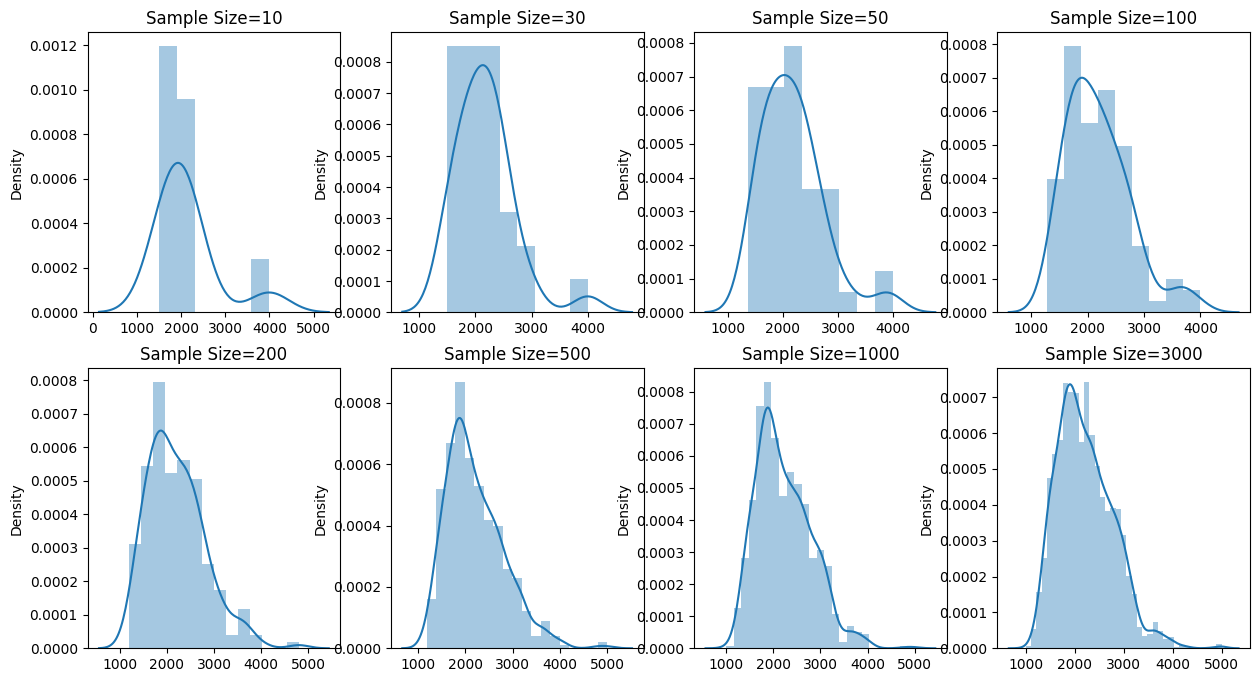

In [55]:
# Distribution of sample means with different sample sizes
num = [10, 30, 50, 100, 200, 500, 1000, 3000]
data_s = []
sample_df = pd.DataFrame()

fig,ax = plt.subplots(2, 4, figsize=(15,8))
for i in num:
    sample_df = computers_data.sample(n=i, random_state=1, replace=True)
    data_s.append(sample_df['price'].tolist())

k=0
for i in range(0,2):
    for j in range(0,4):
        sns.distplot(data_s[k], ax=ax[i,j])
        ax[i,j].set_title(label = 'Sample Size='+str(len(data_s[k])))
        k+=1

plt.show()

#### b) Does the distribution of sample means approximate a normal distribution as sample size increases? 

Yes, the distribution of sample means approximates a normal distribution as the sample size increases.

This is a clear demonstration of the Central Limit Theorem. As the sample size grows larger, the distribution of sample means tends to follow a normal distribution, regardless of the underlying distribution of the population.

In the above histograms, we can observe the following trends:

1. Smaller sample sizes: The distributions are more skewed and less bell-shaped.
2. Larger sample sizes: The distributions become increasingly symmetric and bell-shaped, resembling a normal distribution.

#### c) Check if properties of Central limit theorem for the samples is satisfied.

In [59]:
# Calculation of Population Parameter (Mean, Median, Standard Deviation)
data_p = computers_data['price'].tolist()
p_mean = st.mean(data_p)
p_median = st.median(data_p)
p_sd = st.stdev(data_p)

print('Population Mean = ' +str(p_mean))
print('Population Median = ' +str(p_median))
print('Population SD = ' +str(p_sd))
print('Skewness = ' +str(sts.skew(data_p, bias=False)))
print('Kurtosis = ' +str(sts.kurtosis(data_p, bias=False)))

Population Mean = 2219.576609682058
Population Median = 2144
Population SD = 580.8039556527063
Skewness = 0.7117247480608602
Kurtosis = 0.7304170367653207


In [60]:
# Calculation of Sample Statistics (Mean, Median, Standard Deviation)
sample_df = computers_data.sample(n=100, random_state=1, replace=True)

data_s = sample_df['price'].tolist()
s_mean = st.mean(data_s)
s_median = st.median(data_s)
s_sd = st.stdev(data_s)

print('Sample Mean = ' +str(s_mean))
print('Sample Median = ' +str(s_median))
print('Sample SD = ' +str(s_sd))
print('Skewness = ' +str(sts.skew(data_s, bias=False)))
print('Kurtosis = ' +str(sts.kurtosis(data_s, bias=False)))

Sample Mean = 2181.61
Sample Median = 2095.0
Sample SD = 570.175126295829
Skewness = 0.9404771167109989
Kurtosis = 0.8912673716554047


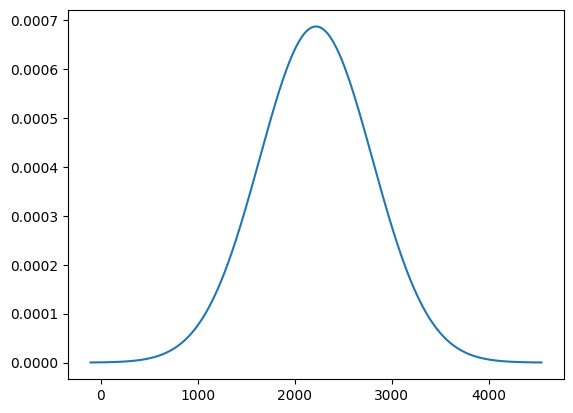

In [61]:
#Probability Distribution curve of population and sample
lower_p = p_mean-4*p_sd
upper_p = p_mean+4*p_sd
norm_p = np.arange(lower_p, upper_p)
plt.plot(norm_p, norm.pdf(norm_p, p_mean, p_sd))

#### Interpretations-

1. The distribution of sample means approximates a normal distribution as the sample size increases.
2. For smaller sample sizes: The distributions are more skewed and less bell-shaped.
3. For larger sample sizes: The distributions become increasingly symmetric and bell-shaped, resembling a normal distribution.
4. Sample Mean is very close to the Population Mean.
5. Sample Standard Deviation is approximately equal to the Population Standard Deviation.
6. According to the graph, distribution is symmetric and bell-shaped, meaning that the data is normally distributed.

# Refining Computer Sales Strategy Through Statistical Analysis Project - Part 2

## Business Objective 4: Analyzing Advertising Budget for Premium Computers by Identifying Budget Allocation

### Task 1

The advertising budget spent on promoting premium computers in 2023 is increased as compared to 2022. The mean advertising budget was 221.3 billion dollars in 2022 and it was 222.2 billion dollars in 2023. A promoter in this company believes that the average advertising budget is higher than that of 2022. Priya, a data analyst, randomly selected 40 premium computers to check this notion. Use a 5% level of significance to test Maya's hypothesis. Consider normally distribution in the population and standard deviation is 74.83.

In [156]:
# Filter for premium computers
premium_computers = computers_data[(computers_data['premium']) == 'yes']

# Calculate the sample average advertising budget for promoting premium computers using simple random sampling without replacement
sample_avg_ad_premium = premium_computers['ads_2023'].sample(n=40, random_state=1).mean()
print("Average advertising budget for promoting premium computers in samples =", sample_avg_ad_premium)

Average advertising budget for promoting premium computers in samples = 211.05


In [158]:
# Test statistics for the hypothesis test
p_mean = 221.3
print('Population mean (μ) =',p_mean)
p_sd = 74.83
print('Population SD (sigma) = ' +str(p_sd))
s_mean = 211.05
print('Sample mean (x) =',s_mean)
print('Sample size (n) = 40')

Population mean (μ) = 221.3
Population SD (sigma) = 74.83
Sample mean (x) = 211.05
Sample size (n) = 40


In [183]:
# For alpha = 0.05, calculate the critical value of the hypothesis test
x = 211.05
mue = 221.3
sigma = 74.83
n = 4
alpha = 0.05

z_critical = norm.ppf(1-alpha)
print('z-critical =', z_critical)

# Calculate the test statistic and p-value for the hypothesis test
z_statistics = (x-mue)/(sigma/math.sqrt(n))
print('z-statistics =', z_statistics)

p_value = norm.sf(abs(z_statistics))
print('p-value =', p_value)

z-critical = 1.6448536269514722
z-statistics = -0.2739542964051851
p-value = 0.3920598722880369


#### Interpretation-

A sample of randomly selected 40 premium computers yields a sample mean of 211.05, which falls in the acceptance region.

The analyst, Priya, decides to accept the null hypothesis.

There is no change in the average advertising budget for promoting premium computers and the hypothesis testing process identifies the same.

## Business Objective 5: Evaluate the Price Difference between Computers with and without CD Players

### Task 2

Is there a statistically significant difference in the average price of computers with CD players and computers without CD players? Use 5% of the significance level for the test.

In [187]:
# Calculate the sample statistics for price of computers with CD players using simple random sampling without replacement
cd_sample = computers_data[computers_data['cd'] == 'yes']['price'].sample(n=100, random_state=1)
n1 = len(cd_sample)
s_mean1 = st.mean(cd_sample)
s_sd1 = st.stdev(cd_sample)
s_var1 = s_sd1**2
print('Sample of Computers with CD players:')
print('Mean = ' +str(s_mean1))
print('Standard Deviation = ' +str(s_sd1))
print('Sample Size = ' +str(n1))
print('Variance = ' +str(s_var1))

# Calculate the sample statistics for price of computers without CD players using simple random sampling without replacement
no_cd_sample = computers_data[computers_data['cd'] == 'no']['price'].sample(n=100, random_state=1)
n2 = len(no_cd_sample)
s_mean2 = st.mean(no_cd_sample)
s_sd2 = st.stdev(no_cd_sample)
s_var2 = s_sd2**2
print('\nSample of Computers without CD players:')
print('Mean = ' +str(s_mean2))
print('Standard Deviation = ' +str(s_sd2))
print('Sample Size = ' +str(n2))
print('Variance = ' +str(s_var2))

Sample of Computers with CD players:
Mean = 2313.32
Standard Deviation = 530.9401396760203
Sample Size = 100
Variance = 281897.43191919196

Sample of Computers without CD players:
Mean = 2087
Standard Deviation = 532.3632275623534
Sample Size = 100
Variance = 283410.606060606


In [185]:
# For alpha = 0.05, calculate the critical value of the hypothesis test
alpha=0.05
z_critical = norm.ppf(1 - alpha/2) # two tailed test
print("z-critical = "+str(z_critical))

# Calculate the test statistic and p-value for the hypothesis test
z_statistics = ((s_mean1 - s_mean2)- 0) / (math.sqrt(s_var1/n1 + s_var2/n2)) 
print("z-statistics = ", z_statistics)

p_value = norm.sf(abs(z_statistics))*2 #two tailed test
print("p-value = "+str(p_value))

z-critical = 1.959963984540054
z-statistics =  3.0100960520289073
p-value = 0.0026116508441702563


#### Interpretation-

The analyst rejects the null hypothesis and can say that there is significant difference in the average price of computers with CD players and computers without CD players and the hypothesis testing process identifies the same.

## Business Objective 6: Analyze Premium Computer Pricing Strategy

### Task 3

#### a) Identify Price Discrepancy for Premium Computers

Determine if the mean price of premium computers differs significantly from $2200? To examine this, select 25 samples of premium computers randomly from the data. Assume the data is normally distributed in the population. Use a 5% significance level to test this hypothesis.

In [192]:
# Calculate the sample statistics for price of premium computers using simple random sampling without replacement
premium_sample = computers_data[computers_data['premium'] == 'yes']['price'].sample(n=25, random_state=1)
s_mean=st.mean(premium_sample)
s_sd=st.stdev(premium_sample)
n=len(premium_sample)
print('Sample Mean = '+str(s_mean))
print('Sample Standard Deviation = '+str(s_sd))
print('Sample Size = '+str(n))

Sample Mean = 2214.28
Sample Standard Deviation = 728.0982946461739
Sample Size = 25


In [202]:
p_mean = 2200       # Population Mean
s_mean = 2214.28    # Sample Mean
s_sd = 728.09       # Sample Standard Deviation
n = 25              # Sample Size
dof = n-1           # Degrees of Freedom
alpha = 0.05        # Significance level 
# As this is a two tailed test, we have to consider alpha/2 i.e. 0.025.

# For alpha = 0.05, calculate the critical value of the hypothesis test
t_critical = t.ppf(alpha/2, dof)
print("t-critical = "+str(t_critical))

# Calculate the test statistic and p-value for the hypothesis test
t_statistic = (s_mean - p_mean) / (s_sd/math.sqrt(n)) 
print("t-statistic =", t_statistic)

p_value = t.sf(abs(t_statistic),dof)*2 # considering two tails
print("p-value =", p_value)

t-critical = -2.063898561628021
t-statistic = 0.09806479968135945
p-value = 0.9226952642712598


#### Interpretation-

A sample of prices of 25 premium computers yields a sample mean of 2214.28, which falls in the acceptance region.

The analyst decides to accept the null hypothesis.

There is no significant change in the average price of premium computers and the hypothesis testing process identifies the same.

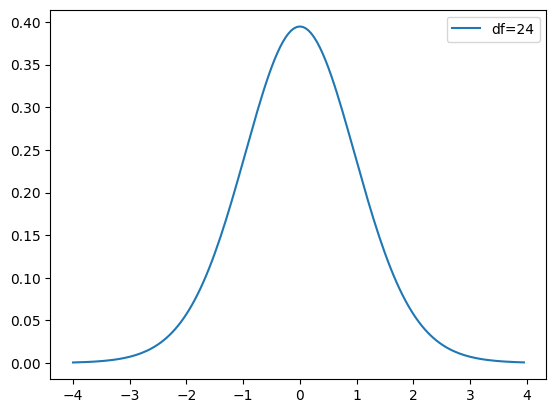

In [229]:
# Plotting the t-distribution
s_mean = 2214.28    # Sample Mean
s_sd = 728.09       # Sample Standard Deviation
upper = s_mean+4*s_sd
lower = s_mean-4*s_sd

x=np.arange(-4,4,.05)
tvals24=t.pdf(x,24)
plt.plot(x,tvals24)
plt.legend(['df=24'])
plt.show()

#### b) Analyze price disparity between premium and non-premium computers

Is there a significant difference in the mean prices of premium and non-premium computers? Assume that the prices are normally distributed and that the population variances are approximately equal. Use a 5% significance level to test this hypothesis.

In [211]:
# Calculate the sample statistics for prices of premium and non-premium computers using simple random sampling without replacement
premium_sample = computers_data[computers_data['premium'] == 'yes']['price'].sample(n=25, random_state=1)
non_premium_sample = computers_data[computers_data['premium'] == 'no']['price'].sample(n=25, random_state=1)

x1=st.mean(premium_sample)
x2=st.mean(non_premium_sample)
sd1=st.stdev(premium_sample)
sd2=st.stdev(non_premium_sample)
v1=(st.stdev(premium_sample))**2
v2=(st.stdev(non_premium_sample))**2
n1=len(premium_sample)
n2=len(non_premium_sample)
df= n1+n2-2

print("Sample mean of premium =",x1)
print("Sample mean of non-premium =",x2)
print("Sample SD of premium =",sd1)
print("Sample SD of non-premium =",sd2)
print("Sample variance of premium =",v1)
print("Sample variance of non-premium =",v2)
print("Sample size of premium =",n1)
print("Sample size of non-premium =",n2)
print('Degrees of freedom =',df)

Sample mean of premium = 2214.28
Sample mean of non-premium = 2144.28
Sample SD of premium = 728.0982946461739
Sample SD of non-premium = 497.6244835884451
Sample variance of premium = 530127.1266666667
Sample variance of non-premium = 247630.12666666668
Sample size of premium = 25
Sample size of non-premium = 25
Degrees of freedom = 48


In [217]:
alpha = 0.05 # Significance level 
# As this is a two tailed test, we have to consider alpha/2 i.e. 0.025.

# For alpha = 0.05, calculate the critical value of the hypothesis test
t_critical = t.ppf(1-0.025, df)
print('t-critical =',t_critical)

# Calculate the test statistic and p-value for the hypothesis test
signal = abs(x1-x2)
noise = math.sqrt(v1*(n1-1) + v2*(n2-1))*math.sqrt(1/n1 + 1/n2)
t_statistic = signal/noise
print('t-statistic =',t_statistic)

p_value = t.sf(abs(t_statistic),df)*2 #considering two tails
print("p-value = ", p_value)

t-critical = 2.010634757624232
t-statistic = 0.05728295199956947
p-value =  0.954557599480346


#### Interpretation-

The analyst decides to accept the null hypothesis.

There is no significant difference in the mean prices of premium and non-premium computers and the hypothesis testing process identifies the same.

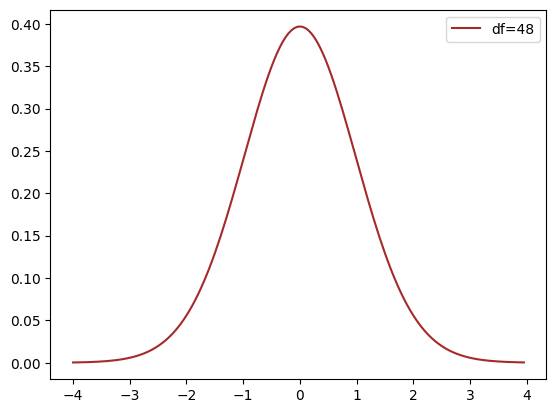

In [227]:
# Plotting the t-distribution
x=np.arange(-4,4,.05)
tvals48=t.pdf(x,48)
plt.plot(x,tvals48,color='brown')
plt.legend(['df=48'])
plt.show()

# Summary

1. 1 in 4 customer purchases a computer with at least 8GB of RAM, computer screen size of 14 inch, and a processor speed exceeding 33 MHz.
2. 9 out of 10 computers sold are premium computers.
3. Half of the premium computers have a CD player.
4. Probability of a computer having a screen size greater than 15 inches and being premium is very low at 8.47%.
5. 7 out of 10 non-premium computers have smaller screen sizes less than or equal to 14 inches.
6. 13.95% of all computers have both a CD player and a multimedia kit.
7. 30.02% of computers having CD player also have a multimedia kit.
8. A computer costs $2219.58 on average.
9. Stratified Sampling technique gives the highest average price of samples taken while Simple Random Sampling with Replacement technique and Clustered Sampling technique give the lowest average price of samples taken.
10. Overall trend indicates that non-premium computers, on average, are more expensive than premium computers in both the population and the samples.
11. The distribution of sample means for computer prices with different sample sizes approximates a normal distribution as the sample size increases. According to the graph, distribution is symmetric and bell-shaped, meaning that the data is normally distributed.
12. For smaller sample sizes: The distributions are more skewed and less bell-shaped.
13. For larger sample sizes: The distributions become increasingly symmetric and bell-shaped, resembling a normal distribution.
14. Sample Mean is very close to the Population Mean for computer prices.
15. Sample Standard Deviation is approximately equal to the Population Standard Deviation for computer prices.
16. There is no change in the average advertising budget for promoting premium computers from 2022 to 2023.
17. There is significant difference in the average price of computers with CD players and computers without CD players.
18. There is no significant change in the average price of premium computers.
19. There is no significant difference in the mean prices of premium and non-premium computers.

# Business Conclusions

1. Product Insights-
    1. Target Market: A significant portion of the customer base is interested in mid-range configurations with at least 8GB RAM, 14-inch screens, and 33 MHz+ processors.
    2. Premium Segment Dominance: Premium computers constitute the majority of sales, indicating a strong preference for high-end features.
    3. CD Player Demand: While half of premium computers include CD players, it's a less popular feature overall.
    4. Screen Size Preferences: Most non-premium computers have smaller screens, suggesting a cost-conscious segment. Larger screens are primarily associated with premium models.

2. Pricing and Cost Analysis-
    1. Pricing Strategy: The overall average price of non-premium computers is higher than premium ones, an intriguing trend that requires deeper investigation.
    2. Sampling Techniques: Stratified sampling provides the highest average price estimates, while simple random sampling with replacement and clustered sampling yield lower estimates.
    3. Price Distribution: The distribution of sample means for computer prices tends towards a normal distribution as sample size increases.

3. Marketing and Advertising-
    1. Advertising Budget: The consistent advertising budget for premium computers suggests a stable marketing strategy.
    2. Product Positioning: The lack of significant price differences between premium and non-premium models might require a re-evaluation of product positioning and value proposition.

4. Recommendations-
    1. Product Line Optimization: Consider expanding the mid-range segment to capitalize on the growing demand for higher-performance, affordable options.
    2. Pricing Strategy Review: Conduct a thorough analysis of the pricing strategy for non-premium computers to understand the factors driving their higher average price.
    3. Targeted Marketing: Implement targeted marketing campaigns for the premium segment, emphasizing features like larger screens and CD players.
    4. Sampling Techniques: For future studies, consider a combination of sampling techniques to obtain more accurate and representative results.
    5. Customer Segmentation: Deeper segmentation analysis can help identify specific customer needs and preferences, enabling tailored product offerings and marketing strategies.